In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
# preprocessing function
def preprocessing_data(df: pd.DataFrame):
    data = df.copy()
    # drop NaN values for some columns
    data = data.dropna(subset=['education_level','major_discipline', 'experience', 'last_new_job'])
    # Replace other NaN with Unknown value 
    data = data.replace(np.nan,'Unknown')
    # relevent_experience replace with 0 and 1, 1 for having experience and 0 for no experience
    data['relevent_experience'] = data['relevent_experience'].replace(['Has relevent experience','No relevent experience'],[1,0])

    # manually assign ordinal numbers to education_level and company_size
    # for graduate level I will give 1 and for master 2 and for phd 3. Graduate level can be equals to masters and phd but usually people with phd would not represent themselves as graduate. 
    # any graduate level certificate can be considered as graduate so I will assign a lower number to graduate than masters. 
    # for company_size unknown will get 0.
    
    data['education_level'] = data['education_level'].replace(['Graduate','Masters','Phd'],[1,2,3])
    data['company_size'] = data['company_size'].replace(['Unknown','<10', '10/49','50-99', '100-500','500-999','1000-4999','5000-9999','10000+'] ,range(0,9))

    # convert experience and last_new_job to numeric values
    data['experience'] = data['experience'].str.replace('>','').str.replace('<','')
    data['experience'] = pd.to_numeric(data['experience'])

    data['last_new_job'] = data['last_new_job'].str.replace('>','')
    data['last_new_job'] = data['last_new_job'].replace('never',0)
    data['last_new_job'] = pd.to_numeric(data['last_new_job'])

    data = pd.get_dummies(data, columns = ['company_type', 'enrolled_university', 'gender', 'major_discipline','city'])
    
    #Normalize data using MinMaxScaler function of sci-kit leaern
    x = data.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    data_scaled = pd.DataFrame(x_scaled, columns = data.columns)
    return(data_scaled)

In [3]:
raw_data =  pd.read_csv("resources/aug_train.csv")
processed_data = preprocessing_data(raw_data)
training_df = processed_data.copy()
training_df.shape

(16007, 152)

In [4]:
training_df.head()

,enrollee_id,city_development_index,relevent_experience,education_level,experience,company_size,last_new_job,training_hours,target,company_type_Early Stage Startup,...,city_city_84,city_city_89,city_city_9,city_city_90,city_city_91,city_city_93,city_city_94,city_city_97,city_city_98,city_city_99
0,0.268051,0.942116,1.0,0.0,1.000000,0.000,0.25,0.104478,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.890497,0.654691,0.0,0.0,0.736842,0.375,1.00,0.137313,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.346306,0.351297,0.0,0.0,0.210526,0.000,0.00,0.244776,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.995836,0.680639,0.0,0.0,0.000000,0.000,0.00,0.152239,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.019893,0.636727,1.0,0.5,1.000000,0.375,1.00,0.020896,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
training_df.describe()

,enrollee_id,city_development_index,relevent_experience,education_level,experience,company_size,last_new_job,training_hours,target,company_type_Early Stage Startup,...,city_city_84,city_city_89,city_city_9,city_city_90,city_city_91,city_city_93,city_city_94,city_city_97,city_city_98,city_city_99
count,16007.000000,16007.000000,16007.000000,16007.000000,16007.000000,16007.000000,16007.000000,16007.000000,16007.000000,16007.000000,...,16007.000000,16007.000000,16007.000000,16007.000000,16007.000000,16007.000000,16007.000000,16007.000000,16007.000000,16007.000000
mean,0.506736,0.762244,0.781158,0.158806,0.505772,0.400606,0.486693,0.191755,0.255451,0.032236,...,0.001312,0.003561,0.000750,0.010308,0.002062,0.001125,0.001374,0.005373,0.004248,0.004748
std,0.289573,0.245885,0.413474,0.258531,0.338182,0.332819,0.339206,0.179169,0.436128,0.176632,...,0.036198,0.059569,0.027371,0.101007,0.045359,0.033516,0.037049,0.073103,0.065041,0.068744
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.256861,0.587824,1.000000,0.000000,0.210526,0.000000,0.250000,0.065672,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.509947,0.922156,1.000000,0.000000,0.421053,0.375000,0.250000,0.137313,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.758464,0.942116,1.000000,0.500000,0.842105,0.625000,1.000000,0.259701,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(training_df.drop('target',axis=1), 
                                                    training_df['target'], test_size=0.20, 
                                                    random_state=42)

In [8]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix , recall_score, precision_score, f1_score

In [9]:
#Usign SGD to model dataset
SGD_model = SGDClassifier(max_iter=1000, tol=1e-3) 

In [10]:
SGD_model.fit(X_train, y_train)

SGDClassifier()

In [11]:
SGD_predictions = SGD_model.predict(X_test)

In [12]:
print("confusion matrix is: \n", confusion_matrix(y_test,SGD_predictions))

confusion matrix is: 
 [[2128  225]
 [ 519  330]]


In [13]:
print("Accuracy score is: " ,accuracy_score(SGD_predictions, y_test), '\nPrecision is : ',precision_score(y_test,SGD_predictions),'\nRecall score is: ' ,recall_score(y_test,SGD_predictions))
print("F1 Score: ", f1_score(y_test, SGD_predictions))

Accuracy score is:  0.7676452217364147 
Precision is :  0.5945945945945946 
Recall score is:  0.38869257950530034
F1 Score:  0.47008547008547014


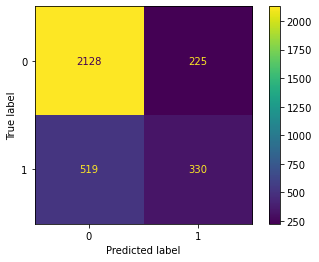

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, SGD_predictions)).plot();

In [14]:
#Usign GridSearchCV to tune parameters
from sklearn.model_selection import GridSearchCV

In [16]:
param_grid = {'loss': ['hinge', 'log', 'perceptron','squared_error','huber','epsilon_insensitive'], 'penalty': ['l1', 'l2','elasticnet'], 'alpha': [0.0001,0.1,100.0],'random_state': [1, None], 'max_iter': [100,1000,5000]}

In [17]:
grid = GridSearchCV(SGDClassifier(),param_grid,refit=True,verbose=3)

In [18]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV 1/5] END alpha=0.0001, loss=hinge, max_iter=100, penalty=l1, random_state=1;, score=0.783 total time=   0.5s
[CV 2/5] END alpha=0.0001, loss=hinge, max_iter=100, penalty=l1, random_state=1;, score=0.768 total time=   0.4s
[CV 3/5] END alpha=0.0001, loss=hinge, max_iter=100, penalty=l1, random_state=1;, score=0.781 total time=   0.5s
[CV 4/5] END alpha=0.0001, loss=hinge, max_iter=100, penalty=l1, random_state=1;, score=0.772 total time=   0.4s
[CV 5/5] END alpha=0.0001, loss=hinge, max_iter=100, penalty=l1, random_state=1;, score=0.781 total time=   0.4s
[CV 1/5] END alpha=0.0001, loss=hinge, max_iter=100, penalty=l1, random_state=None;, score=0.785 total time=   0.5s
[CV 2/5] END alpha=0.0001, loss=hinge, max_iter=100, penalty=l1, random_state=None;, score=0.767 total time=   0.4s
[CV 3/5] END alpha=0.0001, loss=hinge, max_iter=100, penalty=l1, random_state=None;, score=0.781 total time=   0.3s
[CV 4/5] END alpha=0.00

[CV 1/5] END alpha=0.0001, loss=hinge, max_iter=5000, penalty=l2, random_state=1;, score=0.786 total time=   0.3s
[CV 2/5] END alpha=0.0001, loss=hinge, max_iter=5000, penalty=l2, random_state=1;, score=0.769 total time=   0.2s
[CV 3/5] END alpha=0.0001, loss=hinge, max_iter=5000, penalty=l2, random_state=1;, score=0.783 total time=   0.3s
[CV 4/5] END alpha=0.0001, loss=hinge, max_iter=5000, penalty=l2, random_state=1;, score=0.774 total time=   0.2s
[CV 5/5] END alpha=0.0001, loss=hinge, max_iter=5000, penalty=l2, random_state=1;, score=0.780 total time=   0.2s
[CV 1/5] END alpha=0.0001, loss=hinge, max_iter=5000, penalty=l2, random_state=None;, score=0.786 total time=   0.3s
[CV 2/5] END alpha=0.0001, loss=hinge, max_iter=5000, penalty=l2, random_state=None;, score=0.770 total time=   0.2s
[CV 3/5] END alpha=0.0001, loss=hinge, max_iter=5000, penalty=l2, random_state=None;, score=0.782 total time=   0.3s
[CV 4/5] END alpha=0.0001, loss=hinge, max_iter=5000, penalty=l2, random_state=

[CV 2/5] END alpha=0.0001, loss=log, max_iter=1000, penalty=elasticnet, random_state=1;, score=0.765 total time=   0.3s
[CV 3/5] END alpha=0.0001, loss=log, max_iter=1000, penalty=elasticnet, random_state=1;, score=0.770 total time=   0.4s
[CV 4/5] END alpha=0.0001, loss=log, max_iter=1000, penalty=elasticnet, random_state=1;, score=0.762 total time=   0.3s
[CV 5/5] END alpha=0.0001, loss=log, max_iter=1000, penalty=elasticnet, random_state=1;, score=0.758 total time=   0.3s
[CV 1/5] END alpha=0.0001, loss=log, max_iter=1000, penalty=elasticnet, random_state=None;, score=0.791 total time=   0.2s
[CV 2/5] END alpha=0.0001, loss=log, max_iter=1000, penalty=elasticnet, random_state=None;, score=0.770 total time=   0.4s
[CV 3/5] END alpha=0.0001, loss=log, max_iter=1000, penalty=elasticnet, random_state=None;, score=0.775 total time=   0.2s
[CV 4/5] END alpha=0.0001, loss=log, max_iter=1000, penalty=elasticnet, random_state=None;, score=0.765 total time=   0.3s
[CV 5/5] END alpha=0.0001, l

[CV 1/5] END alpha=0.0001, loss=perceptron, max_iter=1000, penalty=l1, random_state=1;, score=0.756 total time=   0.3s
[CV 2/5] END alpha=0.0001, loss=perceptron, max_iter=1000, penalty=l1, random_state=1;, score=0.479 total time=   0.3s
[CV 3/5] END alpha=0.0001, loss=perceptron, max_iter=1000, penalty=l1, random_state=1;, score=0.775 total time=   0.4s
[CV 4/5] END alpha=0.0001, loss=perceptron, max_iter=1000, penalty=l1, random_state=1;, score=0.738 total time=   0.3s
[CV 5/5] END alpha=0.0001, loss=perceptron, max_iter=1000, penalty=l1, random_state=1;, score=0.752 total time=   0.3s
[CV 1/5] END alpha=0.0001, loss=perceptron, max_iter=1000, penalty=l1, random_state=None;, score=0.765 total time=   0.3s
[CV 2/5] END alpha=0.0001, loss=perceptron, max_iter=1000, penalty=l1, random_state=None;, score=0.768 total time=   0.2s
[CV 3/5] END alpha=0.0001, loss=perceptron, max_iter=1000, penalty=l1, random_state=None;, score=0.760 total time=   0.4s
[CV 4/5] END alpha=0.0001, loss=percept

C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END alpha=0.0001, loss=squared_error, max_iter=100, penalty=l1, random_state=1;, score=0.543 total time=   1.0s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END alpha=0.0001, loss=squared_error, max_iter=100, penalty=l1, random_state=1;, score=0.464 total time=   0.9s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END alpha=0.0001, loss=squared_error, max_iter=100, penalty=l1, random_state=1;, score=0.453 total time=   0.9s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END alpha=0.0001, loss=squared_error, max_iter=100, penalty=l1, random_state=1;, score=0.507 total time=   1.1s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END alpha=0.0001, loss=squared_error, max_iter=100, penalty=l1, random_state=1;, score=0.507 total time=   0.9s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END alpha=0.0001, loss=squared_error, max_iter=100, penalty=l1, random_state=None;, score=0.504 total time=   0.9s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END alpha=0.0001, loss=squared_error, max_iter=100, penalty=l1, random_state=None;, score=0.526 total time=   0.9s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END alpha=0.0001, loss=squared_error, max_iter=100, penalty=l1, random_state=None;, score=0.600 total time=   0.9s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END alpha=0.0001, loss=squared_error, max_iter=100, penalty=l1, random_state=None;, score=0.501 total time=   0.9s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END alpha=0.0001, loss=squared_error, max_iter=100, penalty=l1, random_state=None;, score=0.510 total time=   0.9s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END alpha=0.0001, loss=squared_error, max_iter=100, penalty=l2, random_state=1;, score=0.497 total time=   0.5s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END alpha=0.0001, loss=squared_error, max_iter=100, penalty=l2, random_state=1;, score=0.488 total time=   0.5s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END alpha=0.0001, loss=squared_error, max_iter=100, penalty=l2, random_state=1;, score=0.508 total time=   0.5s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END alpha=0.0001, loss=squared_error, max_iter=100, penalty=l2, random_state=1;, score=0.438 total time=   0.5s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END alpha=0.0001, loss=squared_error, max_iter=100, penalty=l2, random_state=1;, score=0.444 total time=   0.5s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END alpha=0.0001, loss=squared_error, max_iter=100, penalty=l2, random_state=None;, score=0.574 total time=   0.5s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END alpha=0.0001, loss=squared_error, max_iter=100, penalty=l2, random_state=None;, score=0.699 total time=   0.5s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END alpha=0.0001, loss=squared_error, max_iter=100, penalty=l2, random_state=None;, score=0.576 total time=   0.5s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END alpha=0.0001, loss=squared_error, max_iter=100, penalty=l2, random_state=None;, score=0.484 total time=   0.5s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END alpha=0.0001, loss=squared_error, max_iter=100, penalty=l2, random_state=None;, score=0.529 total time=   0.5s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END alpha=0.0001, loss=squared_error, max_iter=100, penalty=elasticnet, random_state=1;, score=0.506 total time=   0.9s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END alpha=0.0001, loss=squared_error, max_iter=100, penalty=elasticnet, random_state=1;, score=0.519 total time=   0.9s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END alpha=0.0001, loss=squared_error, max_iter=100, penalty=elasticnet, random_state=1;, score=0.508 total time=   0.9s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END alpha=0.0001, loss=squared_error, max_iter=100, penalty=elasticnet, random_state=1;, score=0.439 total time=   1.0s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END alpha=0.0001, loss=squared_error, max_iter=100, penalty=elasticnet, random_state=1;, score=0.545 total time=   0.9s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END alpha=0.0001, loss=squared_error, max_iter=100, penalty=elasticnet, random_state=None;, score=0.565 total time=   1.0s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END alpha=0.0001, loss=squared_error, max_iter=100, penalty=elasticnet, random_state=None;, score=0.577 total time=   1.0s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END alpha=0.0001, loss=squared_error, max_iter=100, penalty=elasticnet, random_state=None;, score=0.386 total time=   0.9s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END alpha=0.0001, loss=squared_error, max_iter=100, penalty=elasticnet, random_state=None;, score=0.459 total time=   0.9s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END alpha=0.0001, loss=squared_error, max_iter=100, penalty=elasticnet, random_state=None;, score=0.479 total time=   0.9s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, random_state=1;, score=0.535 total time=   9.4s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, random_state=1;, score=0.479 total time=   9.2s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, random_state=1;, score=0.498 total time=   9.7s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, random_state=1;, score=0.487 total time=   9.3s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, random_state=1;, score=0.541 total time=   9.1s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, random_state=None;, score=0.557 total time=   9.0s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, random_state=None;, score=0.422 total time=   9.9s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, random_state=None;, score=0.591 total time=   9.4s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, random_state=None;, score=0.433 total time=  11.0s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, random_state=None;, score=0.514 total time=  10.9s
[CV 1/5] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, random_state=1;, score=0.470 total time=   3.4s
[CV 2/5] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, random_state=1;, score=0.439 total time=   4.5s
[CV 3/5] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, random_state=1;, score=0.526 total time=   3.3s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, random_state=1;, score=0.463 total time=   4.8s
[CV 5/5] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, random_state=1;, score=0.475 total time=   1.8s
[CV 1/5] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, random_state=None;, score=0.441 total time=   3.3s
[CV 2/5] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, random_state=None;, score=0.507 total time=   4.7s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, random_state=None;, score=0.509 total time=   5.0s
[CV 4/5] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, random_state=None;, score=0.407 total time=   4.7s
[CV 5/5] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, random_state=None;, score=0.427 total time=   4.8s
[CV 1/5] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, random_state=1;, score=0.549 total time=   5.9s
[CV 2/5] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, random_state=1;, score=0.540 total time=   5.2s
[CV 3/5] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, random_state=1;, score=0.524 total time=   4.4s
[CV 4/5] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, random_state=1;, score=0.445 total time=   9.3s
[CV 5/5] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, random_state=1;, score=

C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END alpha=0.0001, loss=squared_error, max_iter=5000, penalty=l1, random_state=1;, score=0.545 total time=  51.2s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END alpha=0.0001, loss=squared_error, max_iter=5000, penalty=l1, random_state=1;, score=0.496 total time=  47.7s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END alpha=0.0001, loss=squared_error, max_iter=5000, penalty=l1, random_state=1;, score=0.464 total time=  47.0s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END alpha=0.0001, loss=squared_error, max_iter=5000, penalty=l1, random_state=1;, score=0.716 total time=  47.1s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END alpha=0.0001, loss=squared_error, max_iter=5000, penalty=l1, random_state=1;, score=0.560 total time=  54.6s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END alpha=0.0001, loss=squared_error, max_iter=5000, penalty=l1, random_state=None;, score=0.506 total time=  57.2s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END alpha=0.0001, loss=squared_error, max_iter=5000, penalty=l1, random_state=None;, score=0.503 total time=  58.3s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END alpha=0.0001, loss=squared_error, max_iter=5000, penalty=l1, random_state=None;, score=0.584 total time=  55.2s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END alpha=0.0001, loss=squared_error, max_iter=5000, penalty=l1, random_state=None;, score=0.459 total time=  55.9s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END alpha=0.0001, loss=squared_error, max_iter=5000, penalty=l1, random_state=None;, score=0.389 total time=  55.8s
[CV 1/5] END alpha=0.0001, loss=squared_error, max_iter=5000, penalty=l2, random_state=1;, score=0.470 total time=   3.6s
[CV 2/5] END alpha=0.0001, loss=squared_error, max_iter=5000, penalty=l2, random_state=1;, score=0.439 total time=   5.1s
[CV 3/5] END alpha=0.0001, loss=squared_error, max_iter=5000, penalty=l2, random_state=1;, score=0.526 total time=   3.9s
[CV 4/5] END alpha=0.0001, loss=squared_error, max_iter=5000, penalty=l2, random_state=1;, score=0.453 total time=   8.9s
[CV 5/5] END alpha=0.0001, loss=squared_error, max_iter=5000, penalty=l2, random_state=1;, score=0.475 total time=   2.2s
[CV 1/5] END alpha=0.0001, loss=squared_error, max_iter=5000, penalty=l2, random_state=None;, score=0.474 total time=   3.2s
[CV 2/5] END alpha=0.0001, loss=squared_error, max_iter=5000, penalty=l2, random_state=None;, score=0.421 total time=   3.7s
[CV 3/5] END al

[CV 5/5] END alpha=0.0001, loss=huber, max_iter=1000, penalty=l2, random_state=None;, score=0.782 total time=   0.0s
[CV 1/5] END alpha=0.0001, loss=huber, max_iter=1000, penalty=elasticnet, random_state=1;, score=0.783 total time=   0.1s
[CV 2/5] END alpha=0.0001, loss=huber, max_iter=1000, penalty=elasticnet, random_state=1;, score=0.772 total time=   0.1s
[CV 3/5] END alpha=0.0001, loss=huber, max_iter=1000, penalty=elasticnet, random_state=1;, score=0.777 total time=   0.1s
[CV 4/5] END alpha=0.0001, loss=huber, max_iter=1000, penalty=elasticnet, random_state=1;, score=0.772 total time=   0.1s
[CV 5/5] END alpha=0.0001, loss=huber, max_iter=1000, penalty=elasticnet, random_state=1;, score=0.781 total time=   0.1s
[CV 1/5] END alpha=0.0001, loss=huber, max_iter=1000, penalty=elasticnet, random_state=None;, score=0.783 total time=   0.1s
[CV 2/5] END alpha=0.0001, loss=huber, max_iter=1000, penalty=elasticnet, random_state=None;, score=0.772 total time=   0.1s
[CV 3/5] END alpha=0.00

[CV 2/5] END alpha=0.0001, loss=epsilon_insensitive, max_iter=100, penalty=elasticnet, random_state=None;, score=0.769 total time=   0.6s
[CV 3/5] END alpha=0.0001, loss=epsilon_insensitive, max_iter=100, penalty=elasticnet, random_state=None;, score=0.781 total time=   0.4s
[CV 4/5] END alpha=0.0001, loss=epsilon_insensitive, max_iter=100, penalty=elasticnet, random_state=None;, score=0.774 total time=   0.6s
[CV 5/5] END alpha=0.0001, loss=epsilon_insensitive, max_iter=100, penalty=elasticnet, random_state=None;, score=0.779 total time=   0.5s
[CV 1/5] END alpha=0.0001, loss=epsilon_insensitive, max_iter=1000, penalty=l1, random_state=1;, score=0.783 total time=   0.4s
[CV 2/5] END alpha=0.0001, loss=epsilon_insensitive, max_iter=1000, penalty=l1, random_state=1;, score=0.768 total time=   0.4s
[CV 3/5] END alpha=0.0001, loss=epsilon_insensitive, max_iter=1000, penalty=l1, random_state=1;, score=0.781 total time=   0.4s
[CV 4/5] END alpha=0.0001, loss=epsilon_insensitive, max_iter=10

[CV 4/5] END alpha=0.0001, loss=epsilon_insensitive, max_iter=5000, penalty=elasticnet, random_state=None;, score=0.774 total time=   0.4s
[CV 5/5] END alpha=0.0001, loss=epsilon_insensitive, max_iter=5000, penalty=elasticnet, random_state=None;, score=0.779 total time=   0.5s
[CV 1/5] END alpha=0.1, loss=hinge, max_iter=100, penalty=l1, random_state=1;, score=0.747 total time=   0.0s
[CV 2/5] END alpha=0.1, loss=hinge, max_iter=100, penalty=l1, random_state=1;, score=0.747 total time=   0.0s
[CV 3/5] END alpha=0.1, loss=hinge, max_iter=100, penalty=l1, random_state=1;, score=0.747 total time=   0.0s
[CV 4/5] END alpha=0.1, loss=hinge, max_iter=100, penalty=l1, random_state=1;, score=0.747 total time=   0.0s
[CV 5/5] END alpha=0.1, loss=hinge, max_iter=100, penalty=l1, random_state=1;, score=0.747 total time=   0.0s
[CV 1/5] END alpha=0.1, loss=hinge, max_iter=100, penalty=l1, random_state=None;, score=0.747 total time=   0.0s
[CV 2/5] END alpha=0.1, loss=hinge, max_iter=100, penalty=l

[CV 2/5] END alpha=0.1, loss=hinge, max_iter=5000, penalty=l2, random_state=1;, score=0.747 total time=   0.0s
[CV 3/5] END alpha=0.1, loss=hinge, max_iter=5000, penalty=l2, random_state=1;, score=0.747 total time=   0.0s
[CV 4/5] END alpha=0.1, loss=hinge, max_iter=5000, penalty=l2, random_state=1;, score=0.747 total time=   0.0s
[CV 5/5] END alpha=0.1, loss=hinge, max_iter=5000, penalty=l2, random_state=1;, score=0.747 total time=   0.0s
[CV 1/5] END alpha=0.1, loss=hinge, max_iter=5000, penalty=l2, random_state=None;, score=0.747 total time=   0.0s
[CV 2/5] END alpha=0.1, loss=hinge, max_iter=5000, penalty=l2, random_state=None;, score=0.747 total time=   0.0s
[CV 3/5] END alpha=0.1, loss=hinge, max_iter=5000, penalty=l2, random_state=None;, score=0.747 total time=   0.0s
[CV 4/5] END alpha=0.1, loss=hinge, max_iter=5000, penalty=l2, random_state=None;, score=0.747 total time=   0.0s
[CV 5/5] END alpha=0.1, loss=hinge, max_iter=5000, penalty=l2, random_state=None;, score=0.747 total

[CV 1/5] END alpha=0.1, loss=log, max_iter=1000, penalty=elasticnet, random_state=None;, score=0.747 total time=   0.0s
[CV 2/5] END alpha=0.1, loss=log, max_iter=1000, penalty=elasticnet, random_state=None;, score=0.747 total time=   0.0s
[CV 3/5] END alpha=0.1, loss=log, max_iter=1000, penalty=elasticnet, random_state=None;, score=0.747 total time=   0.0s
[CV 4/5] END alpha=0.1, loss=log, max_iter=1000, penalty=elasticnet, random_state=None;, score=0.747 total time=   0.0s
[CV 5/5] END alpha=0.1, loss=log, max_iter=1000, penalty=elasticnet, random_state=None;, score=0.747 total time=   0.0s
[CV 1/5] END alpha=0.1, loss=log, max_iter=5000, penalty=l1, random_state=1;, score=0.747 total time=   0.0s
[CV 2/5] END alpha=0.1, loss=log, max_iter=5000, penalty=l1, random_state=1;, score=0.747 total time=   0.0s
[CV 3/5] END alpha=0.1, loss=log, max_iter=5000, penalty=l1, random_state=1;, score=0.747 total time=   0.0s
[CV 4/5] END alpha=0.1, loss=log, max_iter=5000, penalty=l1, random_state

[CV 4/5] END alpha=0.1, loss=perceptron, max_iter=1000, penalty=l1, random_state=None;, score=0.253 total time=   0.0s
[CV 5/5] END alpha=0.1, loss=perceptron, max_iter=1000, penalty=l1, random_state=None;, score=0.747 total time=   0.0s
[CV 1/5] END alpha=0.1, loss=perceptron, max_iter=1000, penalty=l2, random_state=1;, score=0.608 total time=   0.0s
[CV 2/5] END alpha=0.1, loss=perceptron, max_iter=1000, penalty=l2, random_state=1;, score=0.562 total time=   0.0s
[CV 3/5] END alpha=0.1, loss=perceptron, max_iter=1000, penalty=l2, random_state=1;, score=0.772 total time=   0.0s
[CV 4/5] END alpha=0.1, loss=perceptron, max_iter=1000, penalty=l2, random_state=1;, score=0.585 total time=   0.0s
[CV 5/5] END alpha=0.1, loss=perceptron, max_iter=1000, penalty=l2, random_state=1;, score=0.300 total time=   0.0s
[CV 1/5] END alpha=0.1, loss=perceptron, max_iter=1000, penalty=l2, random_state=None;, score=0.768 total time=   0.0s
[CV 2/5] END alpha=0.1, loss=perceptron, max_iter=1000, penalty

C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END alpha=0.1, loss=squared_error, max_iter=100, penalty=l1, random_state=1;, score=0.503 total time=   1.0s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END alpha=0.1, loss=squared_error, max_iter=100, penalty=l1, random_state=1;, score=0.485 total time=   0.9s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END alpha=0.1, loss=squared_error, max_iter=100, penalty=l1, random_state=1;, score=0.494 total time=   0.9s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END alpha=0.1, loss=squared_error, max_iter=100, penalty=l1, random_state=1;, score=0.493 total time=   1.1s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END alpha=0.1, loss=squared_error, max_iter=100, penalty=l1, random_state=1;, score=0.466 total time=   1.0s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END alpha=0.1, loss=squared_error, max_iter=100, penalty=l1, random_state=None;, score=0.480 total time=   1.0s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END alpha=0.1, loss=squared_error, max_iter=100, penalty=l1, random_state=None;, score=0.435 total time=   1.1s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END alpha=0.1, loss=squared_error, max_iter=100, penalty=l1, random_state=None;, score=0.423 total time=   1.1s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END alpha=0.1, loss=squared_error, max_iter=100, penalty=l1, random_state=None;, score=0.519 total time=   1.1s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END alpha=0.1, loss=squared_error, max_iter=100, penalty=l1, random_state=None;, score=0.480 total time=   1.1s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END alpha=0.1, loss=squared_error, max_iter=100, penalty=l2, random_state=1;, score=0.506 total time=   0.6s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END alpha=0.1, loss=squared_error, max_iter=100, penalty=l2, random_state=1;, score=0.518 total time=   0.6s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END alpha=0.1, loss=squared_error, max_iter=100, penalty=l2, random_state=1;, score=0.495 total time=   0.5s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END alpha=0.1, loss=squared_error, max_iter=100, penalty=l2, random_state=1;, score=0.486 total time=   0.5s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END alpha=0.1, loss=squared_error, max_iter=100, penalty=l2, random_state=1;, score=0.496 total time=   0.5s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END alpha=0.1, loss=squared_error, max_iter=100, penalty=l2, random_state=None;, score=0.491 total time=   0.5s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END alpha=0.1, loss=squared_error, max_iter=100, penalty=l2, random_state=None;, score=0.519 total time=   0.5s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END alpha=0.1, loss=squared_error, max_iter=100, penalty=l2, random_state=None;, score=0.505 total time=   0.5s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END alpha=0.1, loss=squared_error, max_iter=100, penalty=l2, random_state=None;, score=0.486 total time=   0.5s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END alpha=0.1, loss=squared_error, max_iter=100, penalty=l2, random_state=None;, score=0.504 total time=   0.5s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END alpha=0.1, loss=squared_error, max_iter=100, penalty=elasticnet, random_state=1;, score=0.510 total time=   1.1s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END alpha=0.1, loss=squared_error, max_iter=100, penalty=elasticnet, random_state=1;, score=0.520 total time=   1.0s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END alpha=0.1, loss=squared_error, max_iter=100, penalty=elasticnet, random_state=1;, score=0.494 total time=   0.9s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END alpha=0.1, loss=squared_error, max_iter=100, penalty=elasticnet, random_state=1;, score=0.485 total time=   0.9s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END alpha=0.1, loss=squared_error, max_iter=100, penalty=elasticnet, random_state=1;, score=0.491 total time=   1.1s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END alpha=0.1, loss=squared_error, max_iter=100, penalty=elasticnet, random_state=None;, score=0.487 total time=   1.0s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END alpha=0.1, loss=squared_error, max_iter=100, penalty=elasticnet, random_state=None;, score=0.521 total time=   1.0s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END alpha=0.1, loss=squared_error, max_iter=100, penalty=elasticnet, random_state=None;, score=0.504 total time=   1.2s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END alpha=0.1, loss=squared_error, max_iter=100, penalty=elasticnet, random_state=None;, score=0.484 total time=   1.1s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END alpha=0.1, loss=squared_error, max_iter=100, penalty=elasticnet, random_state=None;, score=0.510 total time=   1.0s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END alpha=0.1, loss=squared_error, max_iter=1000, penalty=l1, random_state=1;, score=0.468 total time=  10.2s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END alpha=0.1, loss=squared_error, max_iter=1000, penalty=l1, random_state=1;, score=0.486 total time=  11.2s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END alpha=0.1, loss=squared_error, max_iter=1000, penalty=l1, random_state=1;, score=0.471 total time=  10.4s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END alpha=0.1, loss=squared_error, max_iter=1000, penalty=l1, random_state=1;, score=0.510 total time=  10.0s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END alpha=0.1, loss=squared_error, max_iter=1000, penalty=l1, random_state=1;, score=0.478 total time=   9.5s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END alpha=0.1, loss=squared_error, max_iter=1000, penalty=l1, random_state=None;, score=0.552 total time=  10.0s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END alpha=0.1, loss=squared_error, max_iter=1000, penalty=l1, random_state=None;, score=0.564 total time=  10.5s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END alpha=0.1, loss=squared_error, max_iter=1000, penalty=l1, random_state=None;, score=0.635 total time=  10.8s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END alpha=0.1, loss=squared_error, max_iter=1000, penalty=l1, random_state=None;, score=0.467 total time=  10.7s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END alpha=0.1, loss=squared_error, max_iter=1000, penalty=l1, random_state=None;, score=0.542 total time=  10.1s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END alpha=0.1, loss=squared_error, max_iter=1000, penalty=l2, random_state=1;, score=0.509 total time=   5.5s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END alpha=0.1, loss=squared_error, max_iter=1000, penalty=l2, random_state=1;, score=0.520 total time=   5.4s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END alpha=0.1, loss=squared_error, max_iter=1000, penalty=l2, random_state=1;, score=0.495 total time=   5.1s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END alpha=0.1, loss=squared_error, max_iter=1000, penalty=l2, random_state=1;, score=0.487 total time=   5.0s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END alpha=0.1, loss=squared_error, max_iter=1000, penalty=l2, random_state=1;, score=0.496 total time=   5.1s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END alpha=0.1, loss=squared_error, max_iter=1000, penalty=l2, random_state=None;, score=0.491 total time=   4.9s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END alpha=0.1, loss=squared_error, max_iter=1000, penalty=l2, random_state=None;, score=0.480 total time=   5.4s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END alpha=0.1, loss=squared_error, max_iter=1000, penalty=l2, random_state=None;, score=0.496 total time=   5.0s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END alpha=0.1, loss=squared_error, max_iter=1000, penalty=l2, random_state=None;, score=0.486 total time=   5.0s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END alpha=0.1, loss=squared_error, max_iter=1000, penalty=l2, random_state=None;, score=0.504 total time=   5.0s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END alpha=0.1, loss=squared_error, max_iter=1000, penalty=elasticnet, random_state=1;, score=0.512 total time=  10.1s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END alpha=0.1, loss=squared_error, max_iter=1000, penalty=elasticnet, random_state=1;, score=0.522 total time=  10.1s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END alpha=0.1, loss=squared_error, max_iter=1000, penalty=elasticnet, random_state=1;, score=0.494 total time=   9.6s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END alpha=0.1, loss=squared_error, max_iter=1000, penalty=elasticnet, random_state=1;, score=0.485 total time=   9.9s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END alpha=0.1, loss=squared_error, max_iter=1000, penalty=elasticnet, random_state=1;, score=0.490 total time=   9.4s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END alpha=0.1, loss=squared_error, max_iter=1000, penalty=elasticnet, random_state=None;, score=0.513 total time=  10.1s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END alpha=0.1, loss=squared_error, max_iter=1000, penalty=elasticnet, random_state=None;, score=0.522 total time=  10.1s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END alpha=0.1, loss=squared_error, max_iter=1000, penalty=elasticnet, random_state=None;, score=0.506 total time=   9.7s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END alpha=0.1, loss=squared_error, max_iter=1000, penalty=elasticnet, random_state=None;, score=0.517 total time=  10.0s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END alpha=0.1, loss=squared_error, max_iter=1000, penalty=elasticnet, random_state=None;, score=0.490 total time=   9.8s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END alpha=0.1, loss=squared_error, max_iter=5000, penalty=l1, random_state=1;, score=0.447 total time=  47.4s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END alpha=0.1, loss=squared_error, max_iter=5000, penalty=l1, random_state=1;, score=0.494 total time=  48.2s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END alpha=0.1, loss=squared_error, max_iter=5000, penalty=l1, random_state=1;, score=0.444 total time=  49.3s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END alpha=0.1, loss=squared_error, max_iter=5000, penalty=l1, random_state=1;, score=0.511 total time=  55.5s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END alpha=0.1, loss=squared_error, max_iter=5000, penalty=l1, random_state=1;, score=0.487 total time=  45.9s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END alpha=0.1, loss=squared_error, max_iter=5000, penalty=l1, random_state=None;, score=0.594 total time=  46.7s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END alpha=0.1, loss=squared_error, max_iter=5000, penalty=l1, random_state=None;, score=0.371 total time=  46.2s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END alpha=0.1, loss=squared_error, max_iter=5000, penalty=l1, random_state=None;, score=0.439 total time=  47.7s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END alpha=0.1, loss=squared_error, max_iter=5000, penalty=l1, random_state=None;, score=0.529 total time=  47.0s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END alpha=0.1, loss=squared_error, max_iter=5000, penalty=l1, random_state=None;, score=0.540 total time=  47.0s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END alpha=0.1, loss=squared_error, max_iter=5000, penalty=l2, random_state=1;, score=0.509 total time=  24.3s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END alpha=0.1, loss=squared_error, max_iter=5000, penalty=l2, random_state=1;, score=0.520 total time=  25.0s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END alpha=0.1, loss=squared_error, max_iter=5000, penalty=l2, random_state=1;, score=0.495 total time=  24.1s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END alpha=0.1, loss=squared_error, max_iter=5000, penalty=l2, random_state=1;, score=0.487 total time=  24.4s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END alpha=0.1, loss=squared_error, max_iter=5000, penalty=l2, random_state=1;, score=0.496 total time=  28.5s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END alpha=0.1, loss=squared_error, max_iter=5000, penalty=l2, random_state=None;, score=0.491 total time=  28.8s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END alpha=0.1, loss=squared_error, max_iter=5000, penalty=l2, random_state=None;, score=0.480 total time=  29.9s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END alpha=0.1, loss=squared_error, max_iter=5000, penalty=l2, random_state=None;, score=0.505 total time=  29.5s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END alpha=0.1, loss=squared_error, max_iter=5000, penalty=l2, random_state=None;, score=0.487 total time=  29.5s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END alpha=0.1, loss=squared_error, max_iter=5000, penalty=l2, random_state=None;, score=0.496 total time=  29.5s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END alpha=0.1, loss=squared_error, max_iter=5000, penalty=elasticnet, random_state=1;, score=0.513 total time=  58.5s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END alpha=0.1, loss=squared_error, max_iter=5000, penalty=elasticnet, random_state=1;, score=0.522 total time=  58.0s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END alpha=0.1, loss=squared_error, max_iter=5000, penalty=elasticnet, random_state=1;, score=0.494 total time=  54.6s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END alpha=0.1, loss=squared_error, max_iter=5000, penalty=elasticnet, random_state=1;, score=0.485 total time=  55.2s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END alpha=0.1, loss=squared_error, max_iter=5000, penalty=elasticnet, random_state=1;, score=0.490 total time=  46.9s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END alpha=0.1, loss=squared_error, max_iter=5000, penalty=elasticnet, random_state=None;, score=0.487 total time=  47.0s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END alpha=0.1, loss=squared_error, max_iter=5000, penalty=elasticnet, random_state=None;, score=0.477 total time=  46.5s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END alpha=0.1, loss=squared_error, max_iter=5000, penalty=elasticnet, random_state=None;, score=0.494 total time=  46.8s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END alpha=0.1, loss=squared_error, max_iter=5000, penalty=elasticnet, random_state=None;, score=0.485 total time=  47.1s


C:\Users\sabat\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END alpha=0.1, loss=squared_error, max_iter=5000, penalty=elasticnet, random_state=None;, score=0.490 total time=  47.3s
[CV 1/5] END alpha=0.1, loss=huber, max_iter=100, penalty=l1, random_state=1;, score=0.747 total time=   0.0s
[CV 2/5] END alpha=0.1, loss=huber, max_iter=100, penalty=l1, random_state=1;, score=0.747 total time=   0.0s
[CV 3/5] END alpha=0.1, loss=huber, max_iter=100, penalty=l1, random_state=1;, score=0.747 total time=   0.0s
[CV 4/5] END alpha=0.1, loss=huber, max_iter=100, penalty=l1, random_state=1;, score=0.747 total time=   0.0s
[CV 5/5] END alpha=0.1, loss=huber, max_iter=100, penalty=l1, random_state=1;, score=0.747 total time=   0.0s
[CV 1/5] END alpha=0.1, loss=huber, max_iter=100, penalty=l1, random_state=None;, score=0.747 total time=   0.0s
[CV 2/5] END alpha=0.1, loss=huber, max_iter=100, penalty=l1, random_state=None;, score=0.747 total time=   0.0s
[CV 3/5] END alpha=0.1, loss=huber, max_iter=100, penalty=l1, random_state=None;, score=0.747 

[CV 2/5] END alpha=0.1, loss=huber, max_iter=5000, penalty=l2, random_state=1;, score=0.747 total time=   0.0s
[CV 3/5] END alpha=0.1, loss=huber, max_iter=5000, penalty=l2, random_state=1;, score=0.747 total time=   0.0s
[CV 4/5] END alpha=0.1, loss=huber, max_iter=5000, penalty=l2, random_state=1;, score=0.747 total time=   0.0s
[CV 5/5] END alpha=0.1, loss=huber, max_iter=5000, penalty=l2, random_state=1;, score=0.747 total time=   0.0s
[CV 1/5] END alpha=0.1, loss=huber, max_iter=5000, penalty=l2, random_state=None;, score=0.747 total time=   0.0s
[CV 2/5] END alpha=0.1, loss=huber, max_iter=5000, penalty=l2, random_state=None;, score=0.747 total time=   0.0s
[CV 3/5] END alpha=0.1, loss=huber, max_iter=5000, penalty=l2, random_state=None;, score=0.747 total time=   0.0s
[CV 4/5] END alpha=0.1, loss=huber, max_iter=5000, penalty=l2, random_state=None;, score=0.747 total time=   0.0s
[CV 5/5] END alpha=0.1, loss=huber, max_iter=5000, penalty=l2, random_state=None;, score=0.747 total

[CV 3/5] END alpha=0.1, loss=epsilon_insensitive, max_iter=1000, penalty=l2, random_state=None;, score=0.747 total time=   0.0s
[CV 4/5] END alpha=0.1, loss=epsilon_insensitive, max_iter=1000, penalty=l2, random_state=None;, score=0.747 total time=   0.0s
[CV 5/5] END alpha=0.1, loss=epsilon_insensitive, max_iter=1000, penalty=l2, random_state=None;, score=0.747 total time=   0.0s
[CV 1/5] END alpha=0.1, loss=epsilon_insensitive, max_iter=1000, penalty=elasticnet, random_state=1;, score=0.747 total time=   0.0s
[CV 2/5] END alpha=0.1, loss=epsilon_insensitive, max_iter=1000, penalty=elasticnet, random_state=1;, score=0.747 total time=   0.0s
[CV 3/5] END alpha=0.1, loss=epsilon_insensitive, max_iter=1000, penalty=elasticnet, random_state=1;, score=0.747 total time=   0.0s
[CV 4/5] END alpha=0.1, loss=epsilon_insensitive, max_iter=1000, penalty=elasticnet, random_state=1;, score=0.747 total time=   0.0s
[CV 5/5] END alpha=0.1, loss=epsilon_insensitive, max_iter=1000, penalty=elasticnet,

[CV 4/5] END alpha=100.0, loss=hinge, max_iter=100, penalty=elasticnet, random_state=1;, score=0.747 total time=   0.0s
[CV 5/5] END alpha=100.0, loss=hinge, max_iter=100, penalty=elasticnet, random_state=1;, score=0.747 total time=   0.1s
[CV 1/5] END alpha=100.0, loss=hinge, max_iter=100, penalty=elasticnet, random_state=None;, score=0.747 total time=   0.0s
[CV 2/5] END alpha=100.0, loss=hinge, max_iter=100, penalty=elasticnet, random_state=None;, score=0.747 total time=   0.0s
[CV 3/5] END alpha=100.0, loss=hinge, max_iter=100, penalty=elasticnet, random_state=None;, score=0.747 total time=   0.0s
[CV 4/5] END alpha=100.0, loss=hinge, max_iter=100, penalty=elasticnet, random_state=None;, score=0.747 total time=   0.1s
[CV 5/5] END alpha=100.0, loss=hinge, max_iter=100, penalty=elasticnet, random_state=None;, score=0.747 total time=   0.0s
[CV 1/5] END alpha=100.0, loss=hinge, max_iter=1000, penalty=l1, random_state=1;, score=0.747 total time=   0.0s
[CV 2/5] END alpha=100.0, loss=h

[CV 5/5] END alpha=100.0, loss=log, max_iter=100, penalty=l1, random_state=1;, score=0.747 total time=   0.0s
[CV 1/5] END alpha=100.0, loss=log, max_iter=100, penalty=l1, random_state=None;, score=0.747 total time=   0.0s
[CV 2/5] END alpha=100.0, loss=log, max_iter=100, penalty=l1, random_state=None;, score=0.747 total time=   0.0s
[CV 3/5] END alpha=100.0, loss=log, max_iter=100, penalty=l1, random_state=None;, score=0.253 total time=   0.0s
[CV 4/5] END alpha=100.0, loss=log, max_iter=100, penalty=l1, random_state=None;, score=0.747 total time=   0.0s
[CV 5/5] END alpha=100.0, loss=log, max_iter=100, penalty=l1, random_state=None;, score=0.253 total time=   0.0s
[CV 1/5] END alpha=100.0, loss=log, max_iter=100, penalty=l2, random_state=1;, score=0.747 total time=   0.0s
[CV 2/5] END alpha=100.0, loss=log, max_iter=100, penalty=l2, random_state=1;, score=0.747 total time=   0.0s
[CV 3/5] END alpha=100.0, loss=log, max_iter=100, penalty=l2, random_state=1;, score=0.747 total time=   

[CV 3/5] END alpha=100.0, loss=log, max_iter=5000, penalty=l2, random_state=None;, score=0.747 total time=   0.0s
[CV 4/5] END alpha=100.0, loss=log, max_iter=5000, penalty=l2, random_state=None;, score=0.747 total time=   0.0s
[CV 5/5] END alpha=100.0, loss=log, max_iter=5000, penalty=l2, random_state=None;, score=0.747 total time=   0.0s
[CV 1/5] END alpha=100.0, loss=log, max_iter=5000, penalty=elasticnet, random_state=1;, score=0.747 total time=   0.0s
[CV 2/5] END alpha=100.0, loss=log, max_iter=5000, penalty=elasticnet, random_state=1;, score=0.747 total time=   0.0s
[CV 3/5] END alpha=100.0, loss=log, max_iter=5000, penalty=elasticnet, random_state=1;, score=0.747 total time=   0.0s
[CV 4/5] END alpha=100.0, loss=log, max_iter=5000, penalty=elasticnet, random_state=1;, score=0.747 total time=   0.0s
[CV 5/5] END alpha=100.0, loss=log, max_iter=5000, penalty=elasticnet, random_state=1;, score=0.747 total time=   0.0s
[CV 1/5] END alpha=100.0, loss=log, max_iter=5000, penalty=elas

[CV 2/5] END alpha=100.0, loss=perceptron, max_iter=1000, penalty=elasticnet, random_state=None;, score=0.747 total time=   0.0s
[CV 3/5] END alpha=100.0, loss=perceptron, max_iter=1000, penalty=elasticnet, random_state=None;, score=0.747 total time=   0.0s
[CV 4/5] END alpha=100.0, loss=perceptron, max_iter=1000, penalty=elasticnet, random_state=None;, score=0.747 total time=   0.0s
[CV 5/5] END alpha=100.0, loss=perceptron, max_iter=1000, penalty=elasticnet, random_state=None;, score=0.747 total time=   0.0s
[CV 1/5] END alpha=100.0, loss=perceptron, max_iter=5000, penalty=l1, random_state=1;, score=0.747 total time=   0.0s
[CV 2/5] END alpha=100.0, loss=perceptron, max_iter=5000, penalty=l1, random_state=1;, score=0.747 total time=   0.0s
[CV 3/5] END alpha=100.0, loss=perceptron, max_iter=5000, penalty=l1, random_state=1;, score=0.747 total time=   0.0s
[CV 4/5] END alpha=100.0, loss=perceptron, max_iter=5000, penalty=l1, random_state=1;, score=0.747 total time=   0.0s
[CV 5/5] END

[CV 4/5] END alpha=100.0, loss=squared_error, max_iter=1000, penalty=l1, random_state=1;, score=0.747 total time=   0.0s
[CV 5/5] END alpha=100.0, loss=squared_error, max_iter=1000, penalty=l1, random_state=1;, score=0.747 total time=   0.0s
[CV 1/5] END alpha=100.0, loss=squared_error, max_iter=1000, penalty=l1, random_state=None;, score=0.747 total time=   0.0s
[CV 2/5] END alpha=100.0, loss=squared_error, max_iter=1000, penalty=l1, random_state=None;, score=0.747 total time=   0.0s
[CV 3/5] END alpha=100.0, loss=squared_error, max_iter=1000, penalty=l1, random_state=None;, score=0.253 total time=   0.1s
[CV 4/5] END alpha=100.0, loss=squared_error, max_iter=1000, penalty=l1, random_state=None;, score=0.747 total time=   0.0s
[CV 5/5] END alpha=100.0, loss=squared_error, max_iter=1000, penalty=l1, random_state=None;, score=0.747 total time=   0.0s
[CV 1/5] END alpha=100.0, loss=squared_error, max_iter=1000, penalty=l2, random_state=1;, score=0.747 total time=   0.0s
[CV 2/5] END alph

[CV 3/5] END alpha=100.0, loss=huber, max_iter=100, penalty=l2, random_state=1;, score=0.747 total time=   0.0s
[CV 4/5] END alpha=100.0, loss=huber, max_iter=100, penalty=l2, random_state=1;, score=0.747 total time=   0.0s
[CV 5/5] END alpha=100.0, loss=huber, max_iter=100, penalty=l2, random_state=1;, score=0.747 total time=   0.0s
[CV 1/5] END alpha=100.0, loss=huber, max_iter=100, penalty=l2, random_state=None;, score=0.253 total time=   0.0s
[CV 2/5] END alpha=100.0, loss=huber, max_iter=100, penalty=l2, random_state=None;, score=0.747 total time=   0.0s
[CV 3/5] END alpha=100.0, loss=huber, max_iter=100, penalty=l2, random_state=None;, score=0.747 total time=   0.0s
[CV 4/5] END alpha=100.0, loss=huber, max_iter=100, penalty=l2, random_state=None;, score=0.747 total time=   0.0s
[CV 5/5] END alpha=100.0, loss=huber, max_iter=100, penalty=l2, random_state=None;, score=0.253 total time=   0.0s
[CV 1/5] END alpha=100.0, loss=huber, max_iter=100, penalty=elasticnet, random_state=1;, 

[CV 1/5] END alpha=100.0, loss=huber, max_iter=5000, penalty=elasticnet, random_state=None;, score=0.253 total time=   0.0s
[CV 2/5] END alpha=100.0, loss=huber, max_iter=5000, penalty=elasticnet, random_state=None;, score=0.747 total time=   0.0s
[CV 3/5] END alpha=100.0, loss=huber, max_iter=5000, penalty=elasticnet, random_state=None;, score=0.747 total time=   0.0s
[CV 4/5] END alpha=100.0, loss=huber, max_iter=5000, penalty=elasticnet, random_state=None;, score=0.747 total time=   0.0s
[CV 5/5] END alpha=100.0, loss=huber, max_iter=5000, penalty=elasticnet, random_state=None;, score=0.747 total time=   0.0s
[CV 1/5] END alpha=100.0, loss=epsilon_insensitive, max_iter=100, penalty=l1, random_state=1;, score=0.747 total time=   0.0s
[CV 2/5] END alpha=100.0, loss=epsilon_insensitive, max_iter=100, penalty=l1, random_state=1;, score=0.747 total time=   0.0s
[CV 3/5] END alpha=100.0, loss=epsilon_insensitive, max_iter=100, penalty=l1, random_state=1;, score=0.747 total time=   0.0s
[C

[CV 5/5] END alpha=100.0, loss=epsilon_insensitive, max_iter=1000, penalty=elasticnet, random_state=None;, score=0.747 total time=   0.0s
[CV 1/5] END alpha=100.0, loss=epsilon_insensitive, max_iter=5000, penalty=l1, random_state=1;, score=0.747 total time=   0.1s
[CV 2/5] END alpha=100.0, loss=epsilon_insensitive, max_iter=5000, penalty=l1, random_state=1;, score=0.747 total time=   0.1s
[CV 3/5] END alpha=100.0, loss=epsilon_insensitive, max_iter=5000, penalty=l1, random_state=1;, score=0.747 total time=   0.0s
[CV 4/5] END alpha=100.0, loss=epsilon_insensitive, max_iter=5000, penalty=l1, random_state=1;, score=0.747 total time=   0.0s
[CV 5/5] END alpha=100.0, loss=epsilon_insensitive, max_iter=5000, penalty=l1, random_state=1;, score=0.747 total time=   0.0s
[CV 1/5] END alpha=100.0, loss=epsilon_insensitive, max_iter=5000, penalty=l1, random_state=None;, score=0.253 total time=   0.0s
[CV 2/5] END alpha=100.0, loss=epsilon_insensitive, max_iter=5000, penalty=l1, random_state=None;

GridSearchCV(estimator=SGDClassifier(),
             param_grid={'alpha': [0.0001, 0.1, 100.0],
                         'loss': ['hinge', 'log', 'perceptron', 'squared_error',
                                  'huber', 'epsilon_insensitive'],
                         'max_iter': [100, 1000, 5000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'random_state': [1, None]},
             verbose=3)

In [19]:
print("the best combination is :" ,grid.best_estimator_ )

the best combination is : SGDClassifier(loss='log', max_iter=5000, penalty='l1')


In [20]:
grid_predictions = grid.predict(X_test)

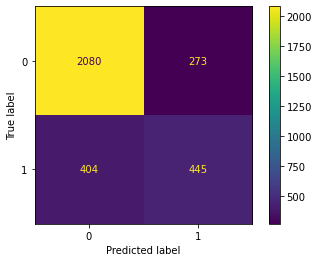

In [17]:
SGD_model = SGDClassifier(loss='log', max_iter=5000, penalty='l1')
SGD_model.fit(X_train, y_train)
grid_predictions = SGD_model.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, grid_predictions)).plot();

In [21]:
print("confusion matrix is: \n", confusion_matrix(y_test,grid_predictions))

confusion matrix is: 
 [[2080  273]
 [ 404  445]]


In [22]:
print("Accuracy score is: " ,accuracy_score(grid_predictions, y_test), '\nPrecision is : ',precision_score(y_test,grid_predictions),'\nRecall score is: ' ,recall_score(y_test,grid_predictions))
print("F1 Score: ", f1_score(y_test, SGD_predictions))

Accuracy score is:  0.7885696439725172 
Precision is :  0.6197771587743732 
Recall score is:  0.5241460541813898
F1 Score:  0.47008547008547014


Grid search parameter tuning did not improve the initial model.

In [35]:
# Drop education_level columns
training_df = processed_data.drop('education_level',axis=1)
training_df.head()

,enrollee_id,city_development_index,relevent_experience,experience,company_size,last_new_job,training_hours,target,company_type_Early Stage Startup,company_type_Funded Startup,...,city_city_84,city_city_89,city_city_9,city_city_90,city_city_91,city_city_93,city_city_94,city_city_97,city_city_98,city_city_99
0,0.268051,0.942116,1.0,1.000000,0.000,0.25,0.104478,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.890497,0.654691,0.0,0.736842,0.375,1.00,0.137313,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.346306,0.351297,0.0,0.210526,0.000,0.00,0.244776,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.995836,0.680639,0.0,0.000000,0.000,0.00,0.152239,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.019893,0.636727,1.0,1.000000,0.375,1.00,0.020896,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
X_train, X_test, y_train, y_test = train_test_split(training_df.drop('target',axis=1), 
                                                    training_df['target'], test_size=0.20, 
                                                    random_state=42)

In [37]:
SGD_model = SGDClassifier(loss='log', max_iter=5000, penalty='l1') #Using tuned parameteres
SGD_model.fit(X_train, y_train)

SGDClassifier(loss='log', max_iter=5000, penalty='l1')

In [38]:
SGD_predictions = SGD_model.predict(X_test)
print("confusion matrix is: \n", confusion_matrix(y_test,SGD_predictions))

confusion matrix is: 
 [[2217  136]
 [ 608  241]]


In [39]:
print("Accuracy score is: " ,accuracy_score(SGD_predictions, y_test))

Accuracy score is:  0.7676452217364147


In [40]:

print("Accuracy score is: " ,accuracy_score(SGD_predictions, y_test), '\nPrecision is : ',precision_score(y_test,SGD_predictions),'\nRecall score is: ' ,recall_score(y_test,SGD_predictions))

Accuracy score is:  0.7676452217364147 
Precision is :  0.6392572944297082 
Recall score is:  0.2838633686690224


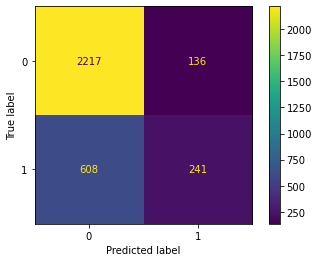

In [41]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, SGD_predictions)).plot();

In [ ]:
# from sklearn.linear_model import SGDClassifier
# SGD_model = SGDClassifier(loss='log', max_iter=5000, penalty='l1')
# SGD_model.fit(X_train, y_train)
# grid_predictions = SGD_model.predict(X_test)
# f1 = f1_score(y_test,y_pred)